In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\project\data\cleaneddata.csv", low_memory=False)
df.head()

NameError: name 'pd' is not defined

In [ ]:
lst = ['InvoiceNo','StockCode','Description','Quantity','UnitPrice','CustomerID','Country','TotalPrice','Year','Month','Day','Time']
for i in lst:
    if df[i].dtype in ['int64', 'float64']:
        print(f"Column {i} has {(df[i] < 0).sum()} negative values")

Column Quantity has 0 negative values
Column UnitPrice has 0 negative values
Column CustomerID has 0 negative values
Column TotalPrice has 0 negative values
Column Year has 0 negative values
Column Month has 0 negative values
Column Day has 0 negative values


In [ ]:
negative_values = (df.select_dtypes(include=['number']) < 0).sum()
print(negative_values)


Quantity      0
UnitPrice     0
CustomerID    0
TotalPrice    0
Year          0
Month         0
Day           0
dtype: int64


In [ ]:
print(df['Quantity'].describe(),end='\n\n')
print(df['UnitPrice'].describe(),end='\n\n')
print(df['TotalPrice'].describe())


count    525460.00000
mean         10.68106
std         157.39957
min           1.00000
25%           1.00000
50%           4.00000
75%          11.00000
max       80995.00000
Name: Quantity, dtype: float64

count    525460.000000
mean          3.918228
std          36.073270
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

count    525460.000000
mean         20.252942
std         271.543898
min           0.000000
25%           3.900000
50%           9.920000
75%          17.700000
max      168469.600000
Name: TotalPrice, dtype: float64


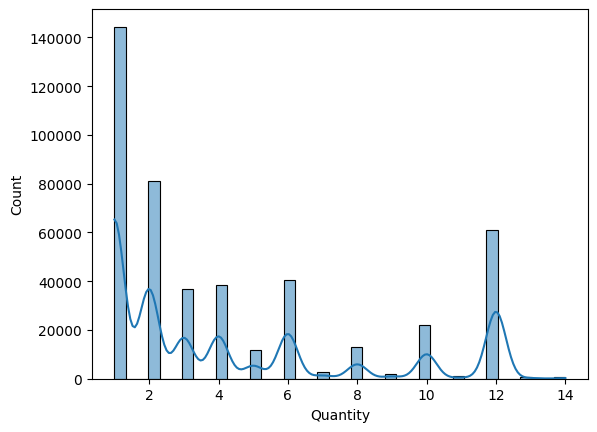

In [ ]:
sns.histplot(df[df['Quantity'] < 15]['Quantity'], bins=40,kde=True)
plt.show()


In [ ]:
df["Description"].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
                                      ... 
LUNCH BAG RED SPOTTY                     1
SET/5 RED SPOTTY LID GLASS BOWLS         1
FRYING PAN RED POLKADOT                  1
BLUE PAINTED KASHMIRI CHAIR              1
PAPER CRAFT , LITTLE BIRDIE              1
Name: count, Length: 4077, dtype: int64

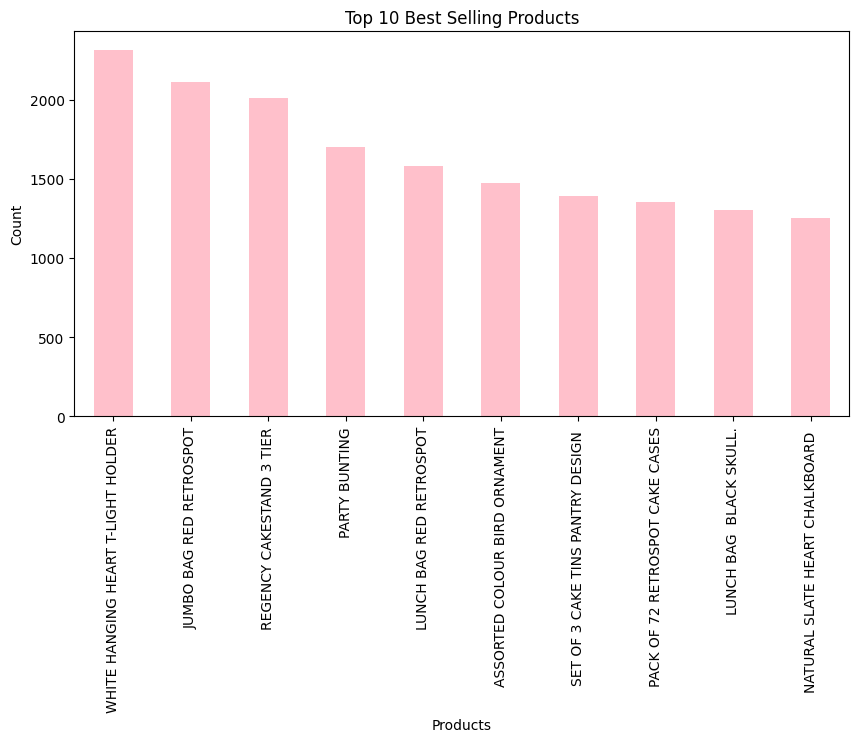

In [ ]:
top_products = df["Description"].value_counts().head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind="bar", color="pink")
plt.title("Top 10 Best Selling Products")
plt.xlabel("Products")
plt.ylabel("Count")
plt.show()

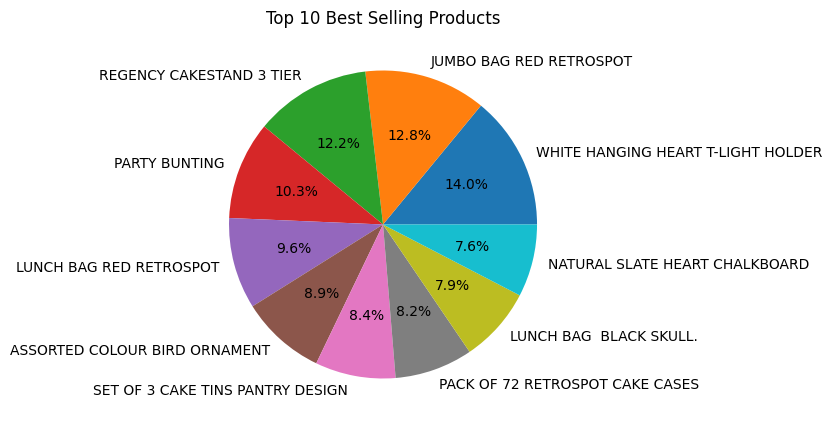

In [ ]:
top_products = df["Description"].value_counts().head(10)
plt.figure(figsize=(10,5))
# top_products.plot(kind="pie", color="pink")
plt.pie(top_products,autopct='%1.1f%%',labels=top_products.index)
plt.title("Top 10 Best Selling Products")

plt.show()


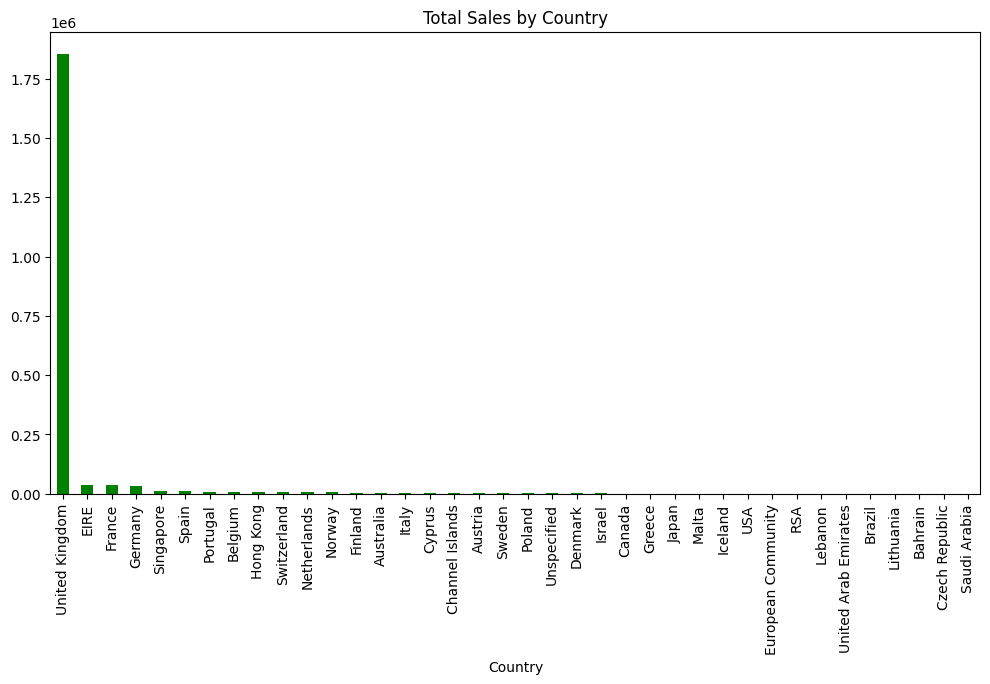

In [ ]:
sales_per_country = df.groupby("Country")["UnitPrice"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sales_per_country.plot(kind="bar", color="green")
plt.title("Total Sales by Country")
plt.xticks(rotation=90)
plt.show()


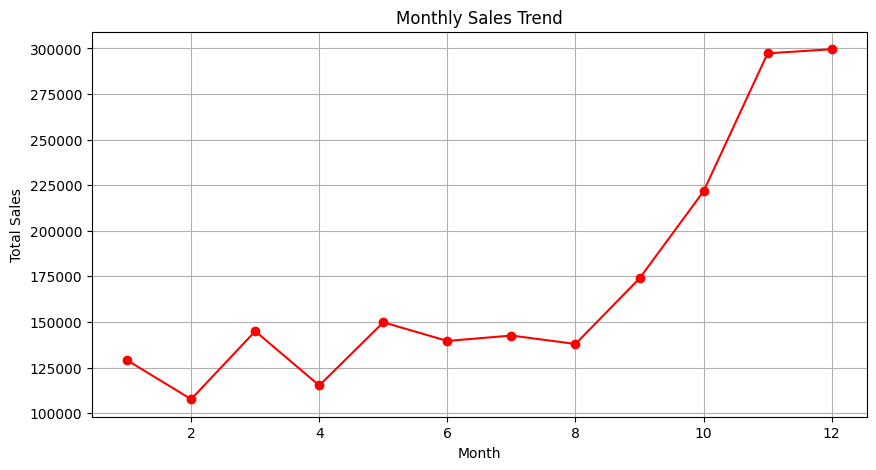

In [ ]:
df.groupby("Month")["UnitPrice"].sum().plot(kind="line", marker="o", figsize=(10, 5), color='red')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


In [ ]:
x = df.groupby("Month")[]
plt.figure(figsize=(12,6))
plt.line()

Month
1     128987.150
2     107600.480
3     144929.080
4     115129.081
5     149789.680
6     139565.420
7     142528.261
8     137903.100
9     173874.922
10    221646.600
11    297325.200
12    299593.070
Name: UnitPrice, dtype: float64

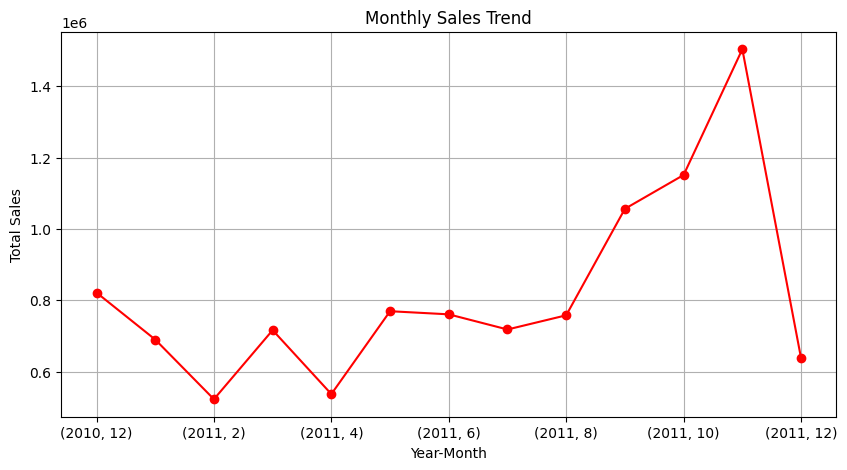

In [ ]:
plt.figure(figsize=(10, 5))
df.groupby(["Year", "Month"])["TotalPrice"].sum().plot(kind="line", marker="o", color='red')
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

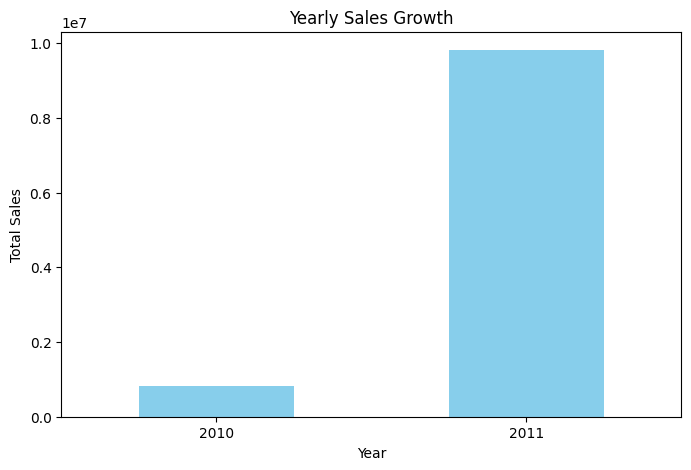

In [ ]:
plt.figure(figsize=(8, 5))
df.groupby("Year")["TotalPrice"].sum().plot(kind="bar", color="skyblue")
plt.title("Yearly Sales Growth")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()


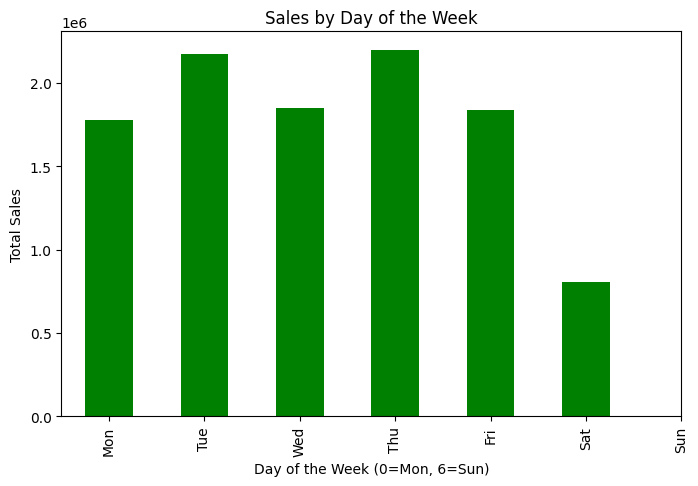

In [ ]:
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])  # Combine columns into Date
df["Weekday"] = df["Date"].dt.dayofweek  # Extract weekday (0=Monday, 6=Sunday)

plt.figure(figsize=(8, 5))
df.groupby("Weekday")["TotalPrice"].sum().plot(kind="bar", color="green")
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week (0=Mon, 6=Sun)")
plt.ylabel("Total Sales")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


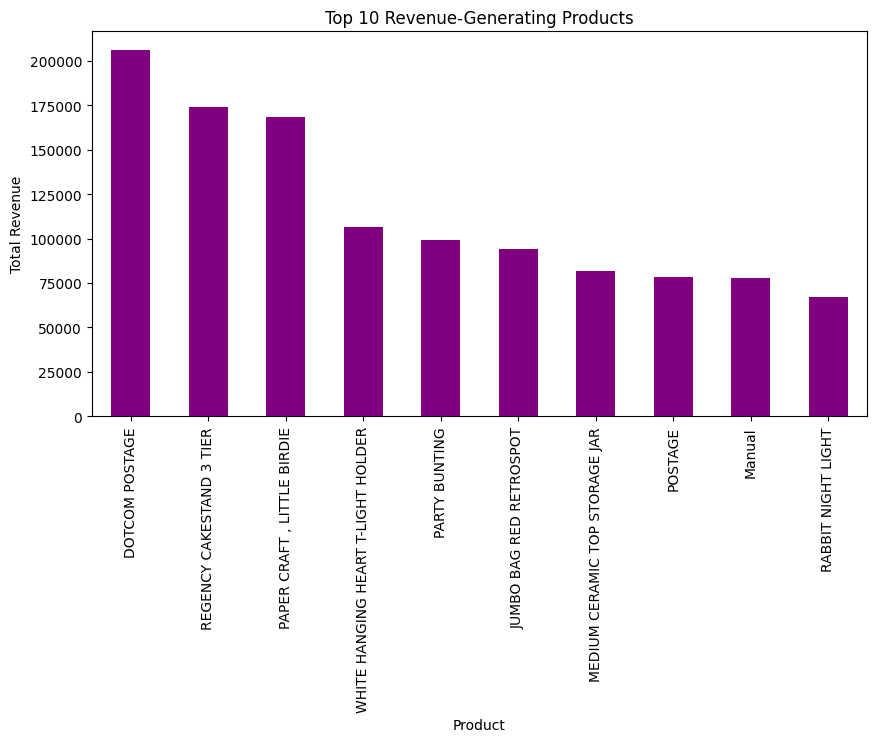

In [ ]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]  # Create a revenue column

plt.figure(figsize=(10, 5))
top_revenue_products = df.groupby("Description")["Revenue"].sum().nlargest(10)
top_revenue_products.plot(kind="bar", color="purple")
plt.title("Top 10 Revenue-Generating Products")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.show()
